# Iris DataSet Species Detetction USING Support Vector Macine ( SVM ) And GridSearchCV :

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [7]:
iris=load_iris()

In [9]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [10]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [12]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [15]:
df=pd.DataFrame(iris['data'],columns=iris['feature_names'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [16]:
df['Target Class']=iris['target']


In [28]:
l=[]
for x in df['Target Class']:
    if x==0:
        l.append('setosa')
    elif x==1:
        l.append('versicolor')
    else:
        l.append('virginica')
df['species']=l

In [29]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target Class,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Target Class       150 non-null    int32  
 5   species            150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
Target Class,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [32]:
df.isnull().sum() #To Check For Null Values

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Target Class         0
species              0
dtype: int64

## Exploratory Data Analysis :

c:\python38\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\python38\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


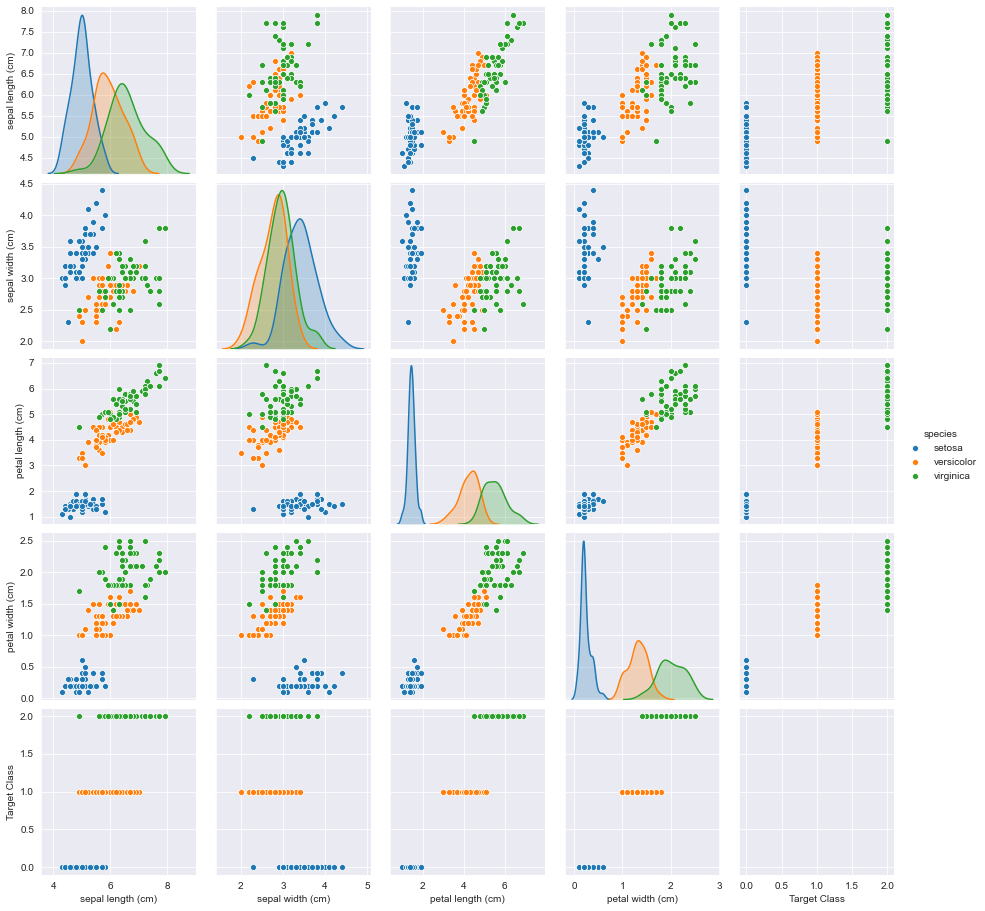

In [34]:
sns.set_style('darkgrid')
sns.pairplot(df,hue='species')

Text(0.5, 1.0, 'Setosa Species KDE Plot')

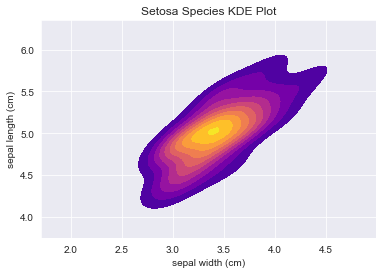

In [49]:
setosa = df[df['species']=='setosa']
sns.kdeplot(setosa['sepal width (cm)'],setosa['sepal length (cm)'],cmap='plasma',shade=True,shade_lowest=False)
plt.title('Setosa Species KDE Plot')

Text(0.5, 1.0, 'Versicolor Species KDE Plot')

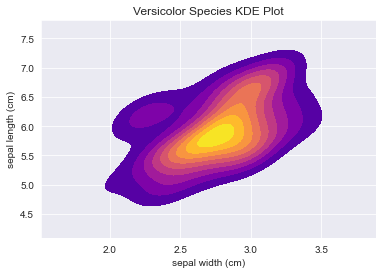

In [50]:
versicolor = df[df['species']=='versicolor']
sns.kdeplot(versicolor['sepal width (cm)'],versicolor['sepal length (cm)'],cmap='plasma',shade=True,shade_lowest=False)
plt.title('Versicolor Species KDE Plot')

Text(0.5, 1.0, 'Virginica Species KDE Plot')

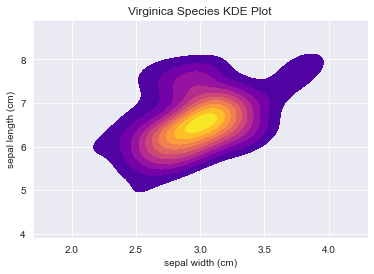

In [51]:

virginica = df[df['species']=='virginica']
sns.kdeplot(virginica['sepal width (cm)'],virginica['sepal length (cm)'],cmap='plasma',shade=True,shade_lowest=False)
plt.title('Virginica Species KDE Plot')

In [56]:
df.corr()['Target Class'].sort_values(ascending=False)

Target Class         1.000000
petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)    -0.426658
Name: Target Class, dtype: float64

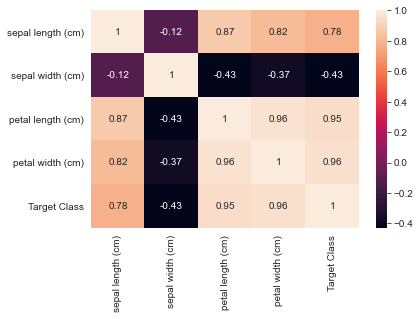

In [57]:
sns.heatmap(df.corr(),annot=True)

## Train Test Split:

In [114]:
from sklearn.model_selection import train_test_split

In [115]:
X=df.drop(['Target Class','species'],axis=1)
y=df['species']

In [116]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

## SVC Model Train :

In [117]:
from sklearn.svm import SVC

In [118]:
model=SVC()

In [119]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [120]:
model.predict(X_test)

array(['setosa', 'setosa', 'virginica', 'virginica', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'setosa',
       'virginica', 'virginica', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'setosa'],
      dtype=object)

In [121]:
predict=model.predict(X_test)

## Model Evaluation :

In [122]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [123]:
print('The Classification Report is :')
print('\n')
print(classification_report(y_test,predict))
print('\n')
print("Confusion Matrix : ")
print('\n')
print(confusion_matrix(y_test,predict))
print('\n')
print('The Accuracy Is : ',round(accuracy_score(y_test,predict),2))

The Classification Report is :


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.93      0.93      0.93        14
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



Confusion Matrix : 


[[16  0  0]
 [ 0 13  1]
 [ 0  1 14]]


The Accuracy Is :  0.96


## Using GridSearchCV For Better Parameters :

In [124]:
from sklearn.model_selection import GridSearchCV

In [125]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.001,0.0001]}

In [126]:
grid=GridSearchCV(SVC(),param_grid,verbose=3,refit=True)

In [127]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.952, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=1.000, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.952, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.905, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.905, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.857, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] ........................ C=1, gamma=1, score=0.952, total=   0.0s
[CV] C=1, gamma=1 ....................................................
[CV] ........................ C=1, gamma=1, score=0.952, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=1.000, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=1.000, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.952, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.905, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=0.952, total=   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] 

[CV] ................ C=1000, gamma=0.0001, score=1.000, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.952, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.905, total=   0.0s
[CV] C=1000, gamma=0.0001 ............................................
[CV] ................ C=1000, gamma=0.0001, score=0.952, total=   0.0s


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.7s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [128]:
grid.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [129]:
grid.best_params_

{'C': 10, 'gamma': 0.1}

In [130]:
grid_pred=grid.predict(X_test)

In [137]:
df1=pd.DataFrame({'Actual Species':y_test,'Predicted Species':grid_pred})
df1.head(10)

,Actual Species,Predicted Species
21,setosa,setosa
37,setosa,setosa
120,virginica,virginica
124,virginica,virginica
135,virginica,virginica
95,versicolor,versicolor
112,virginica,virginica
106,virginica,virginica
128,virginica,virginica
57,versicolor,versicolor


### TEST CASE ( ANY RANDOM VALUE TESTING EXAMPLE ) :

In [136]:
t_case=[[6.2,3.8,1.6,0.4]] #Any 4 Random Features as per our dataframe
v=grid.predict(t_case)
print(v)

['setosa']


## Evaluation for GridSearchCV Parameters :

In [131]:
print('The Classification Report is :')
print('\n')
print(classification_report(y_test,grid_pred))
print('\n')
print("Confusion Matrix : ")
print('\n')
print(confusion_matrix(y_test,grid_pred))
print('\n')
print('The Accuracy Is : ',round(accuracy_score(y_test,grid_pred),2))

The Classification Report is :


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.93      0.96        14
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Confusion Matrix : 


[[16  0  0]
 [ 0 13  1]
 [ 0  0 15]]


The Accuracy Is :  0.98


#### As You Can See, by Performing Grid Search CV , we found suitable parameters for refit of our model and our accuracy has been increased to 0.98...therefore..increasing our model performeance ...!!!!